In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [39]:
# https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [40]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [41]:
df["class"]=(df["class"]=="g").astype(int)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

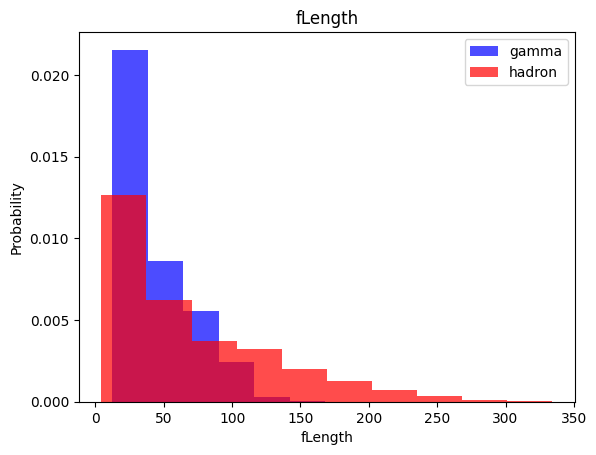

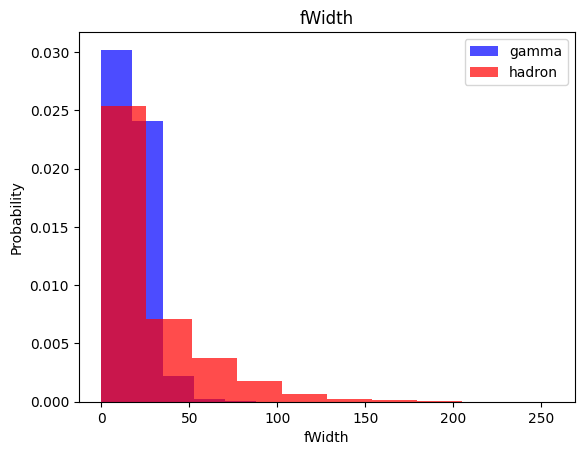

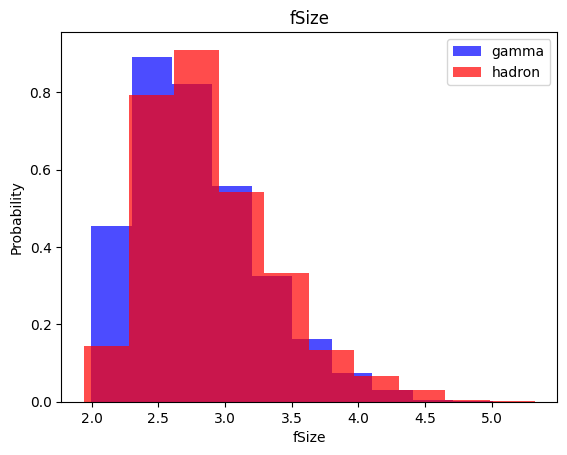

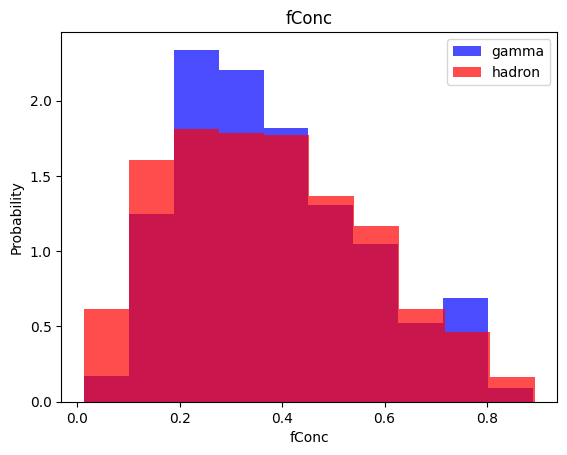

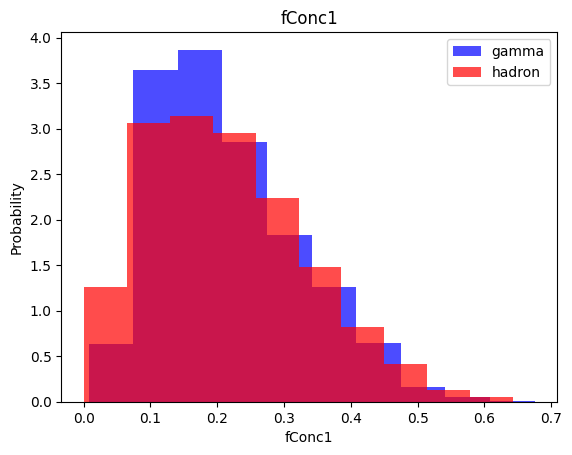

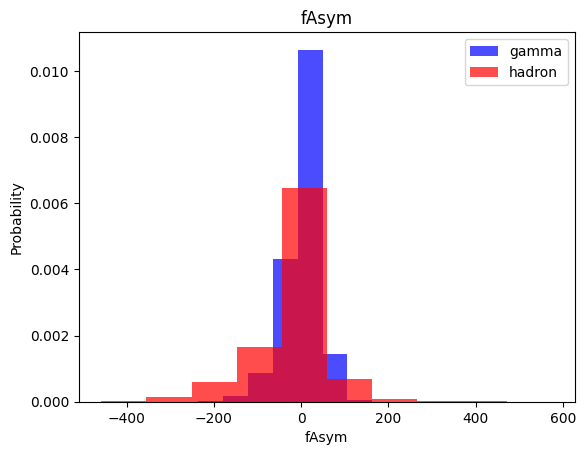

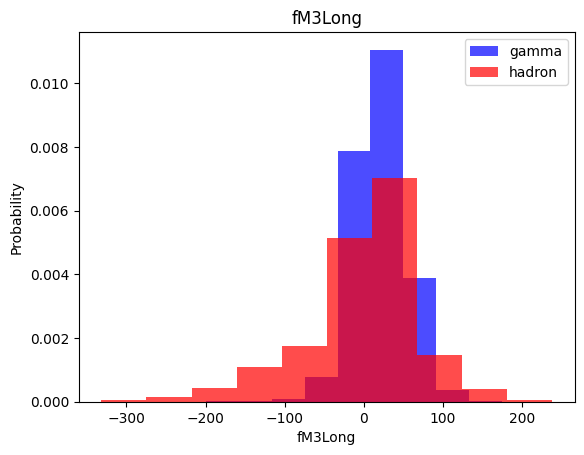

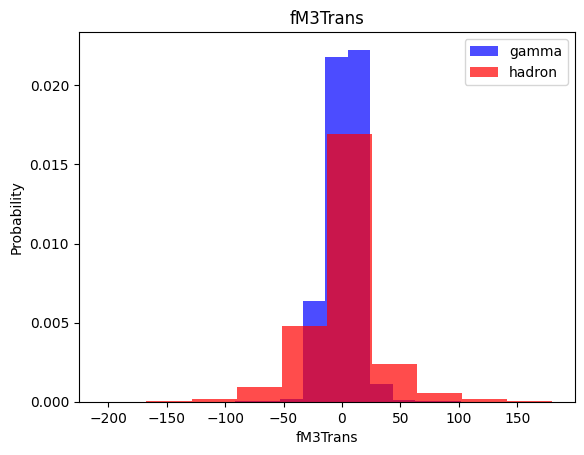

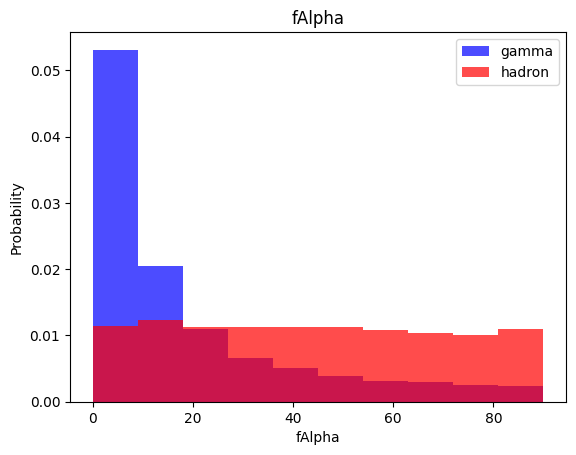

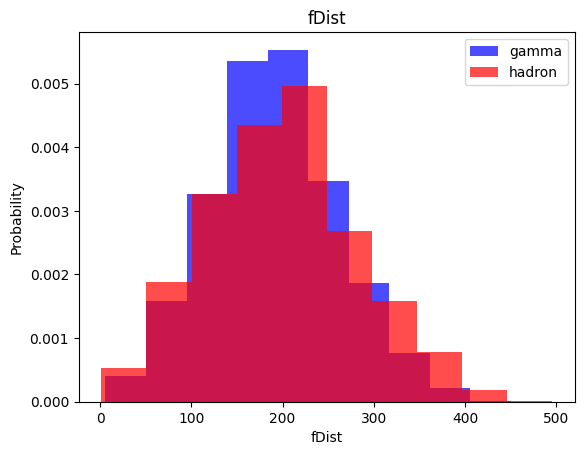

In [42]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma',alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron',alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [43]:
#train, validation, test datasets


In [44]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [45]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X= scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [46]:
train, X_train, y_train= scale_dataset(train, oversample=True)
valid, X_valid, y_valid= scale_dataset(valid, oversample=False)
test, X_test, y_test= scale_dataset(test, oversample=False)


In [47]:
# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [49]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred=knn_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1324
           1       0.84      0.90      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [54]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1324
           1       0.73      0.90      0.81      2480

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [57]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1324
           1       0.84      0.82      0.83      2480

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



SVM

In [58]:
from sklearn.svm import SVC

In [59]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [60]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1324
           1       0.88      0.90      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.85      3804



Neural Net


In [61]:
import tensorflow as tf


In [82]:
def plot_loss(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax1.grid(True).grid(True)
    plt.show()

In [83]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs): 
  nn_model =tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history= nn_model.fit(
      X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0

  )
  return nn_model, history

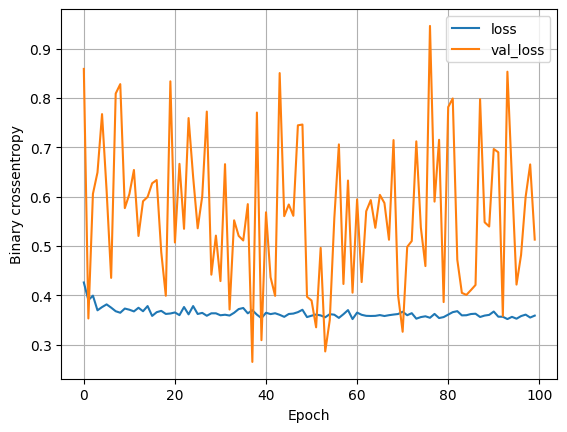

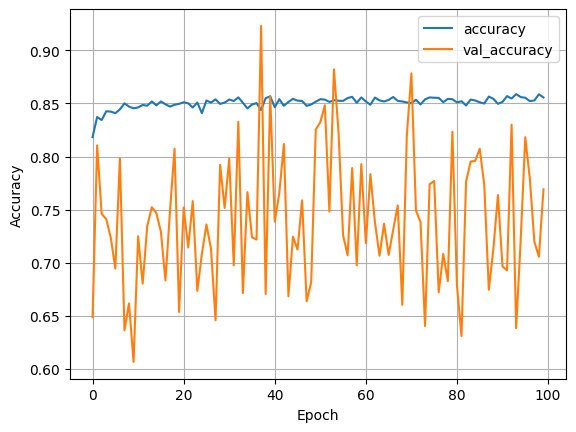

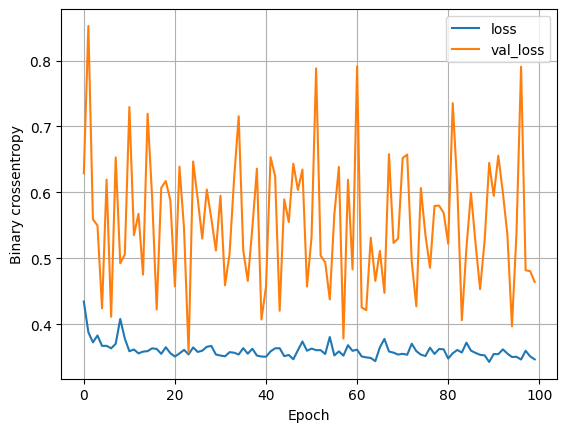

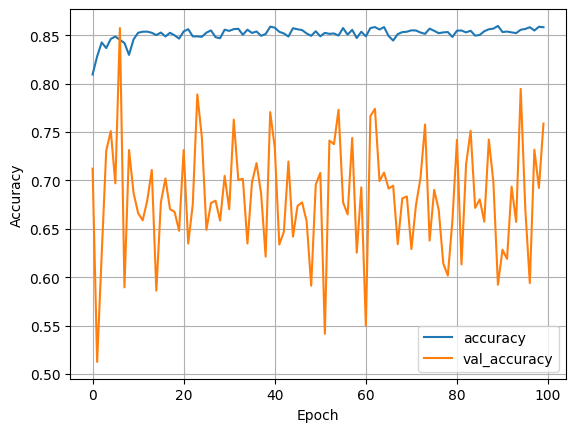

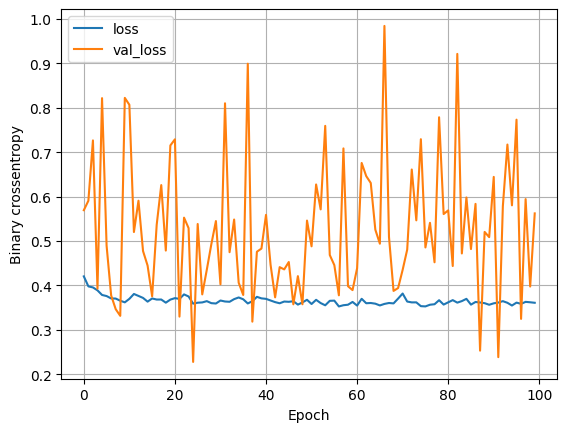

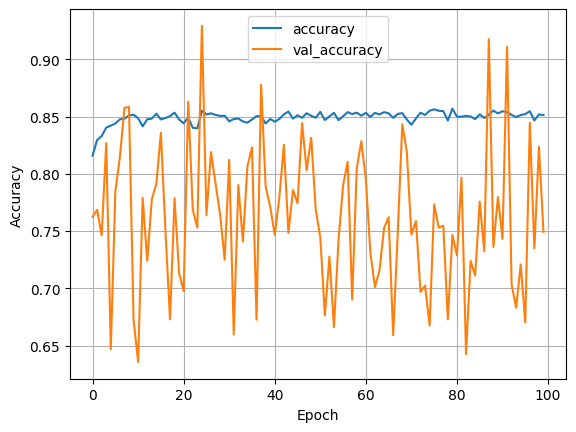

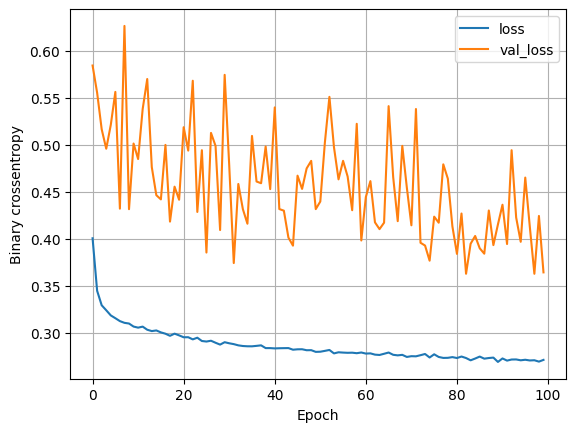

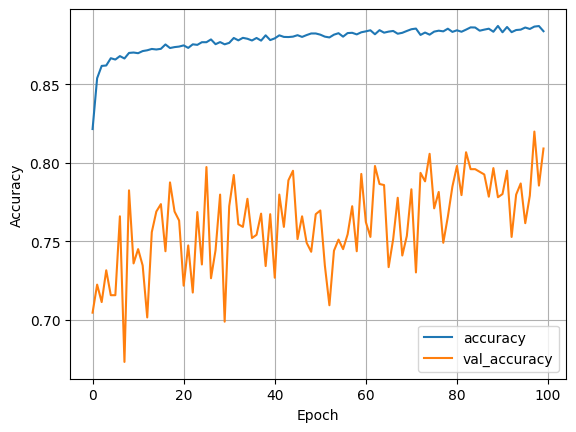

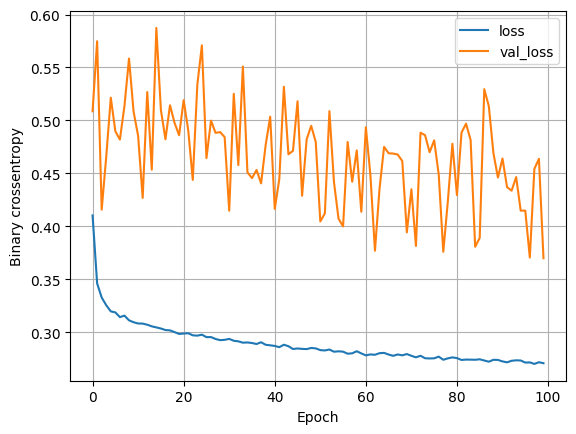

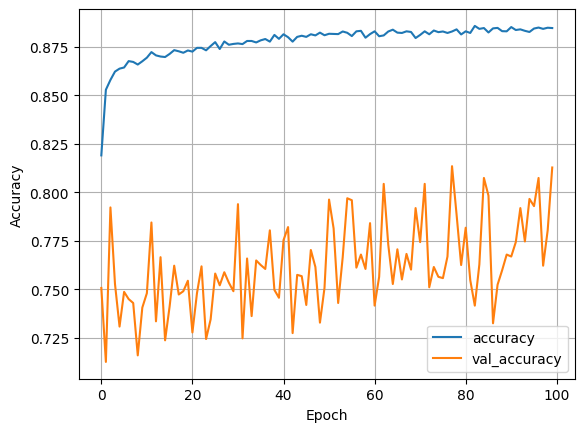

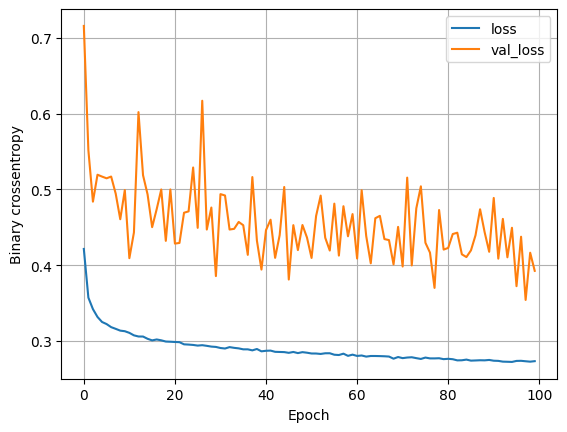

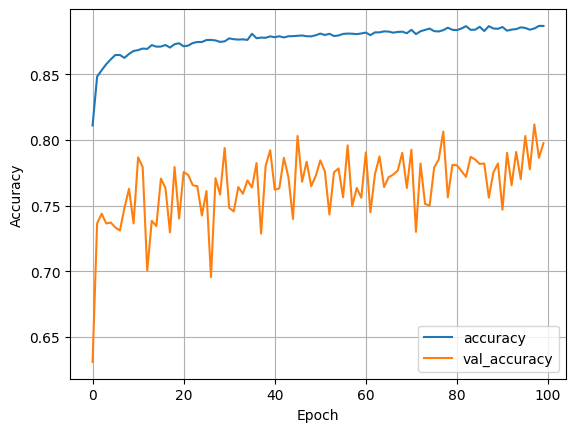

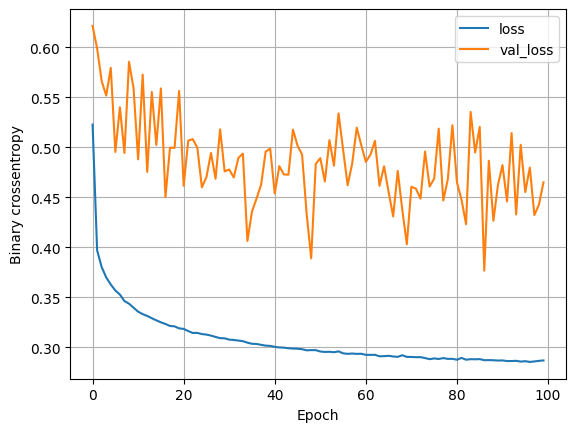

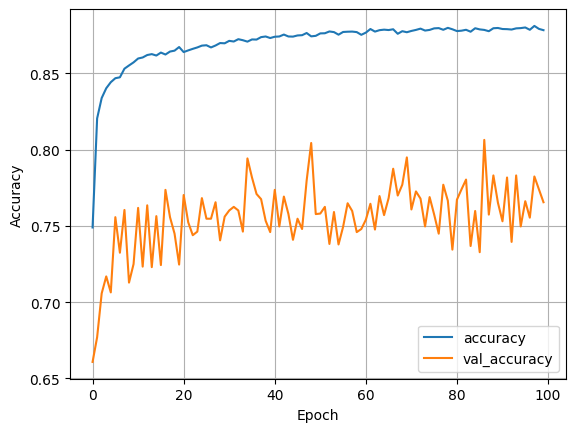

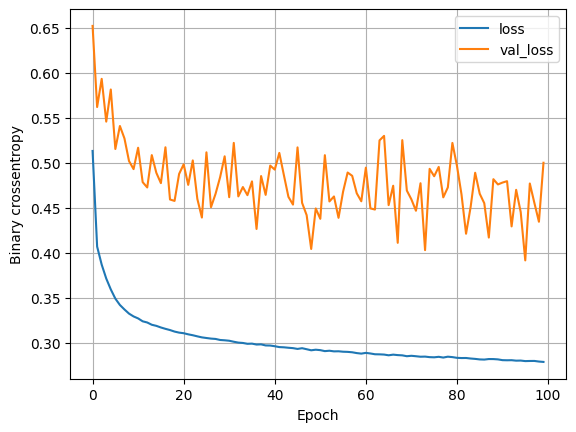

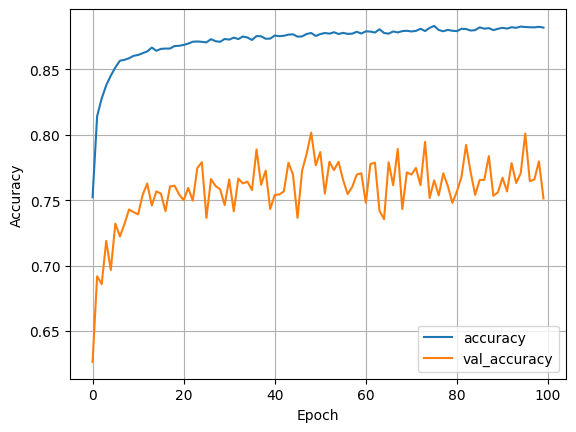

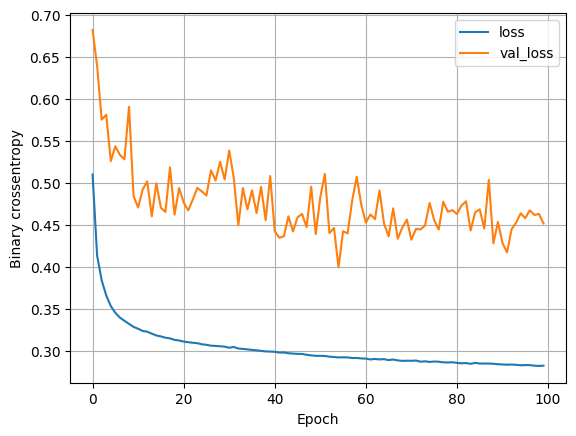

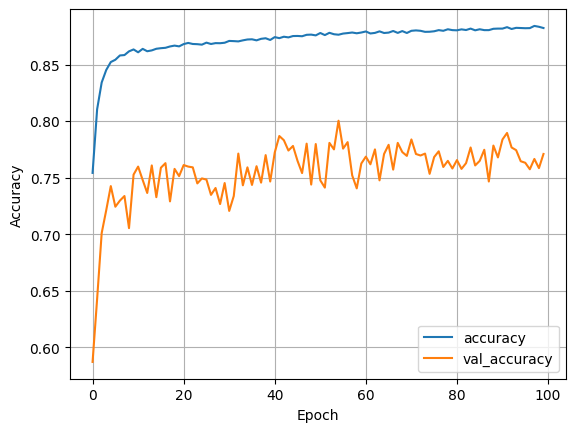

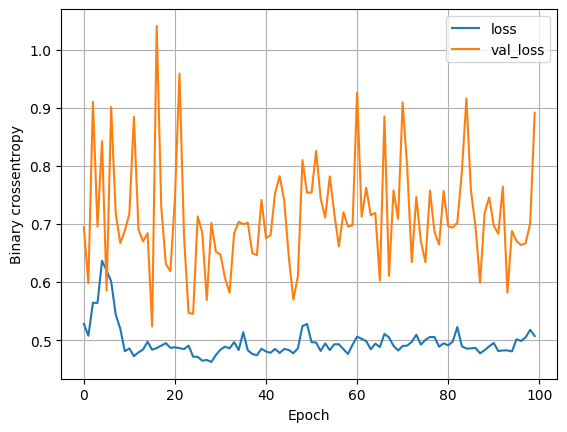

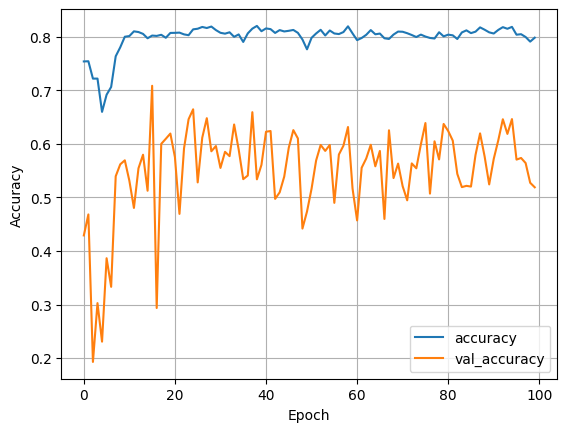

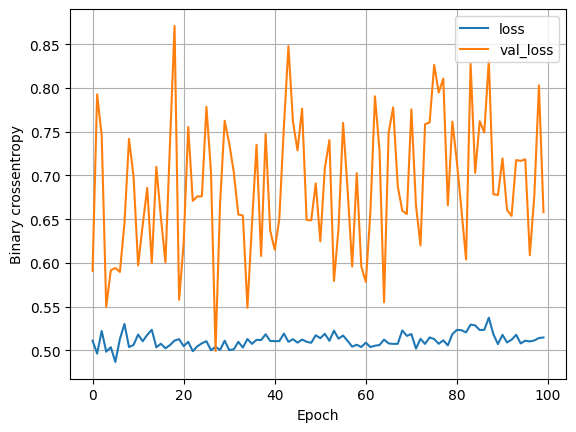

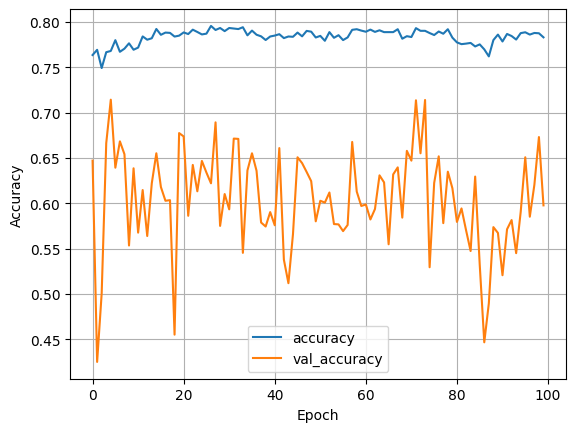

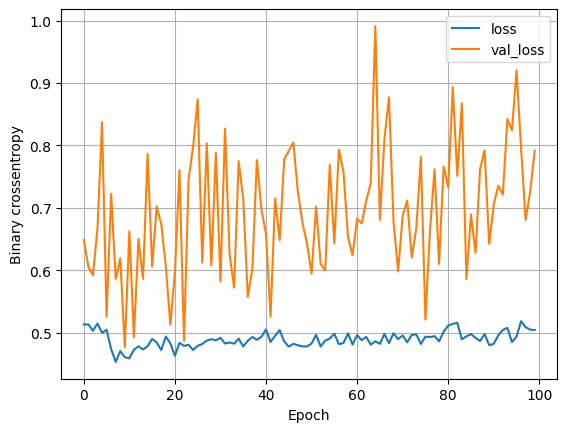

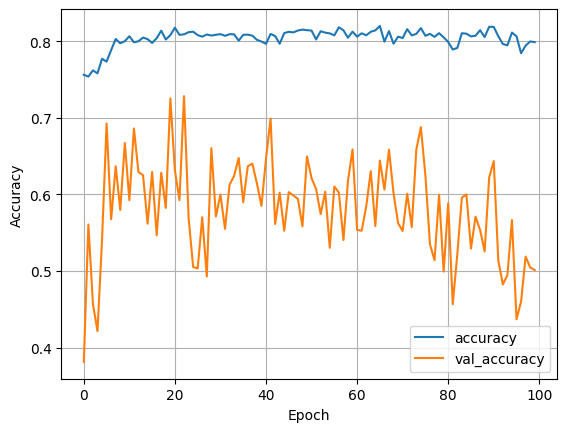

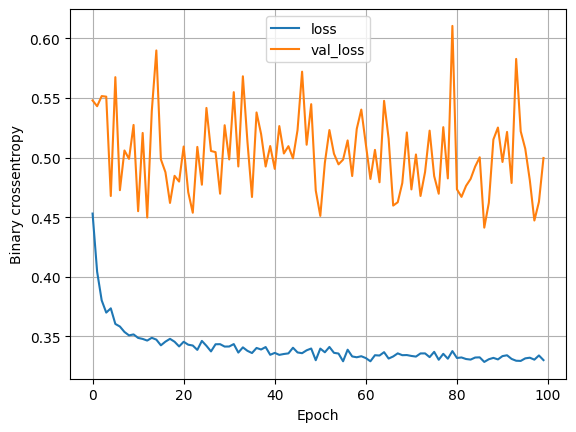

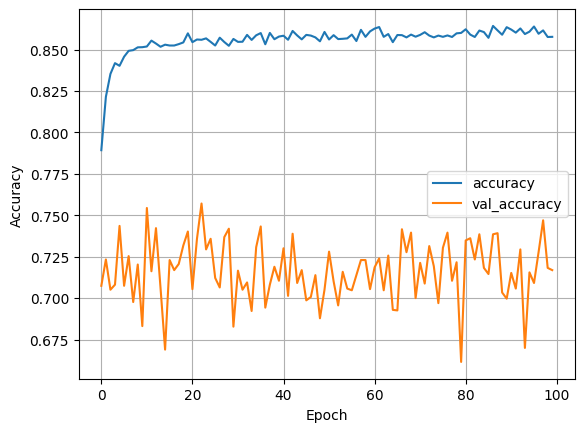

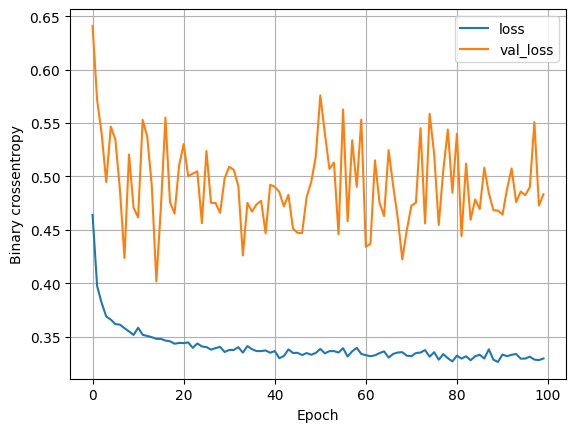

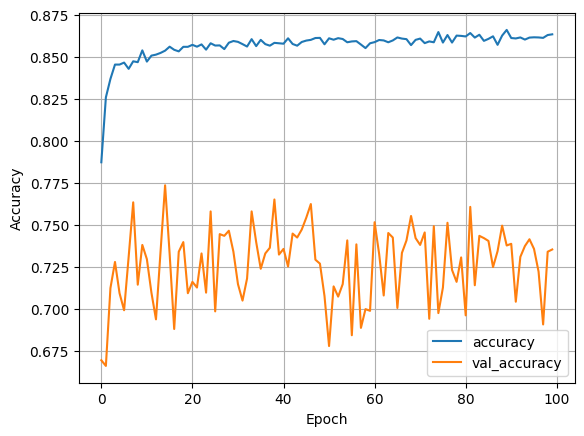

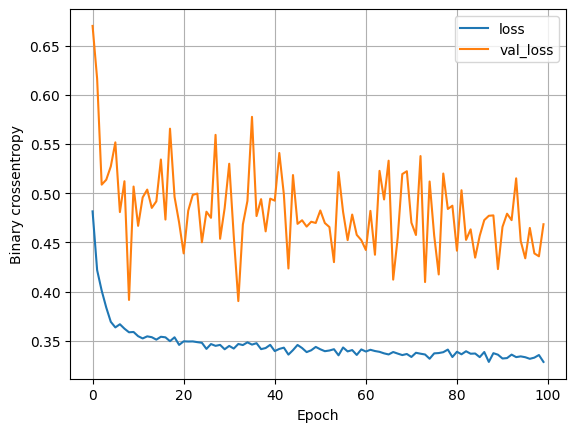

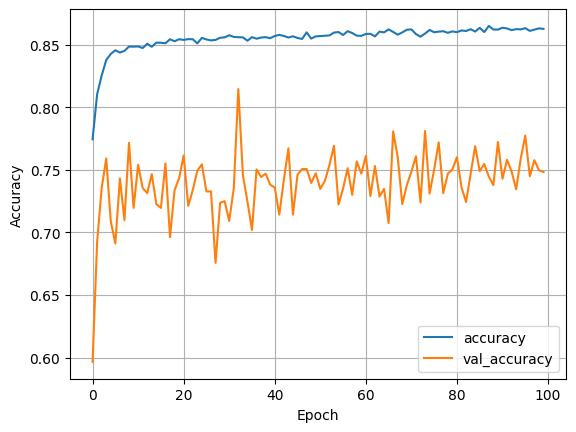

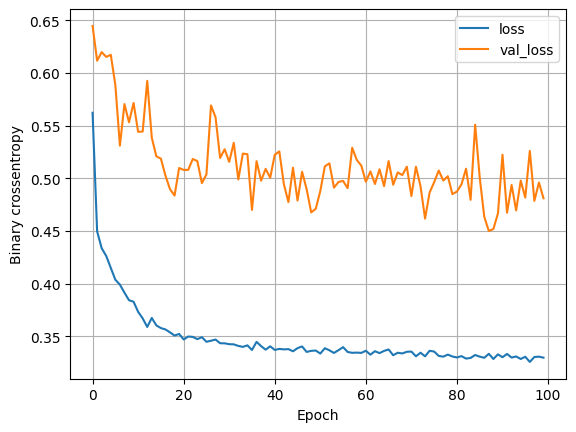

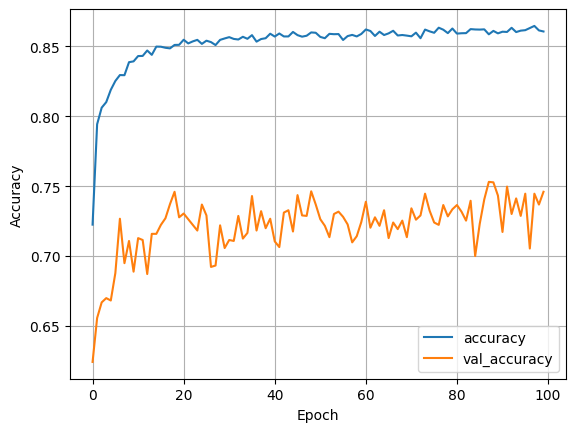

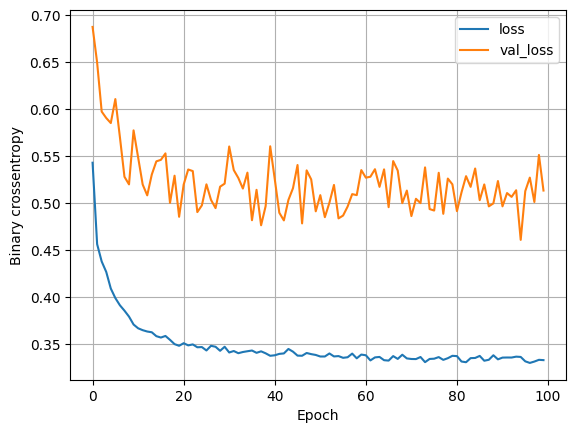

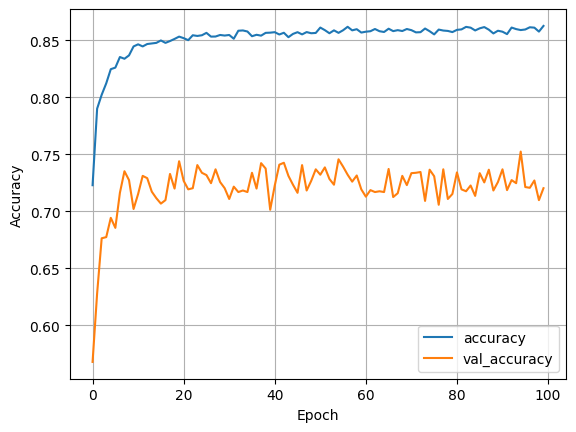

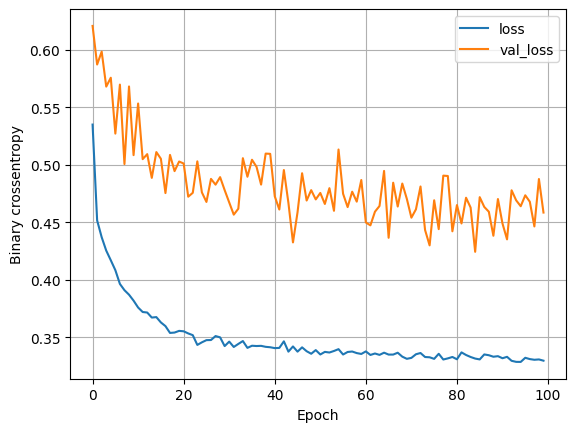

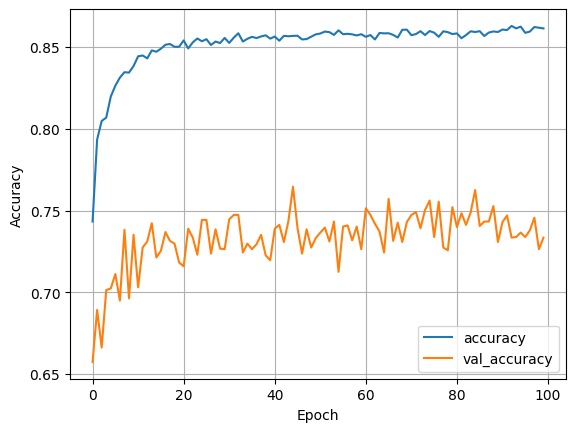

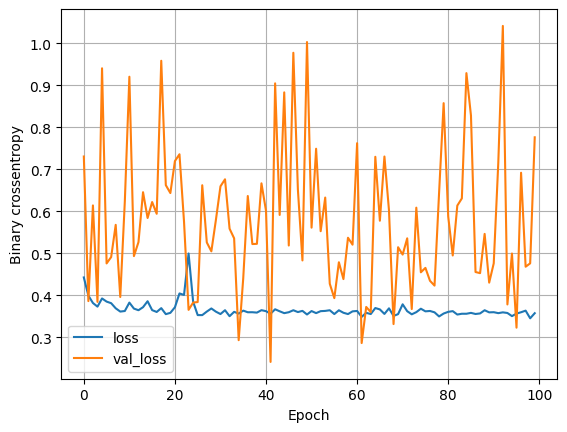

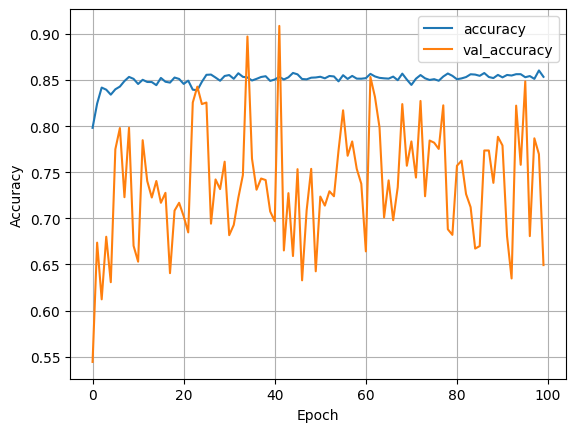

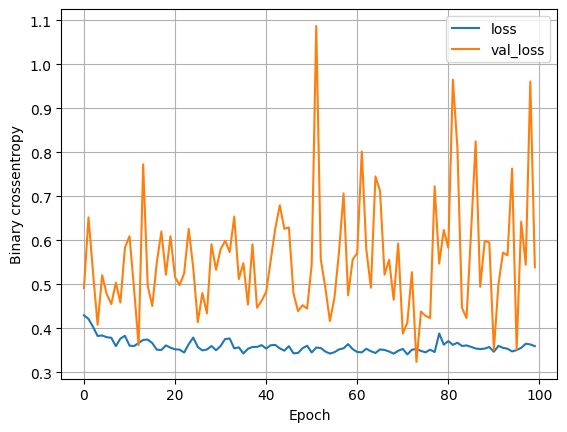

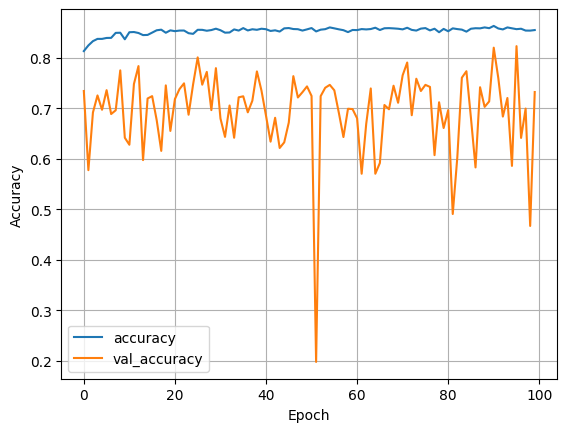

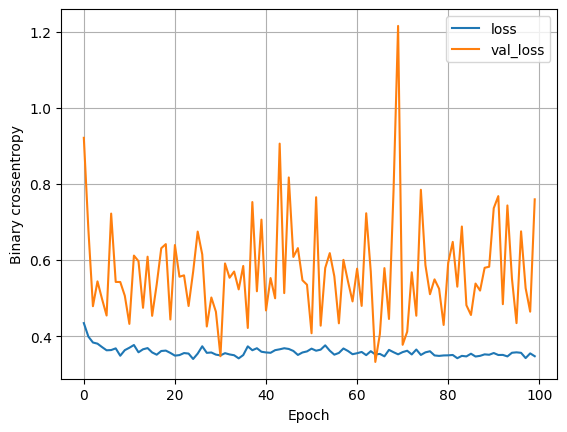

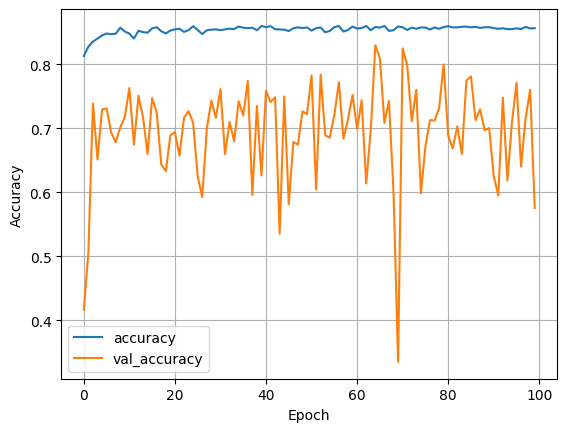

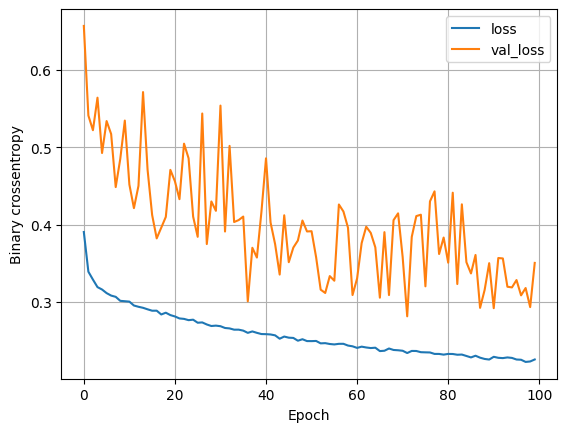

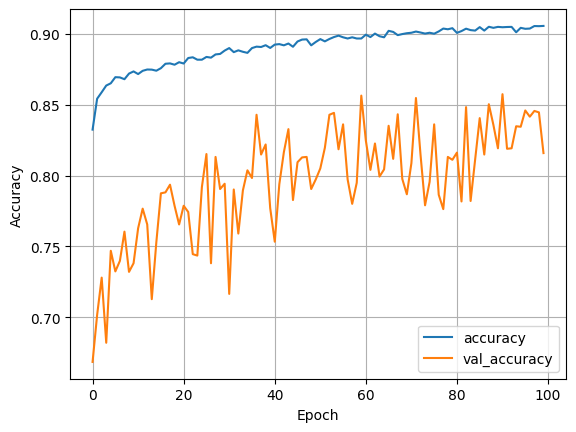

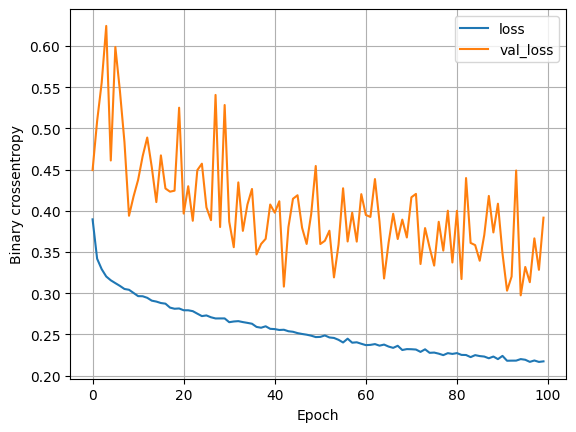

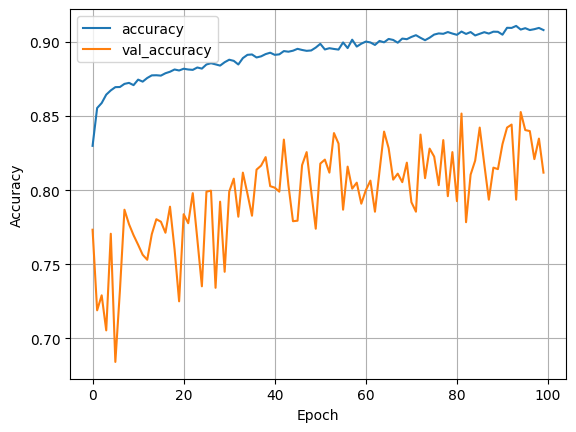

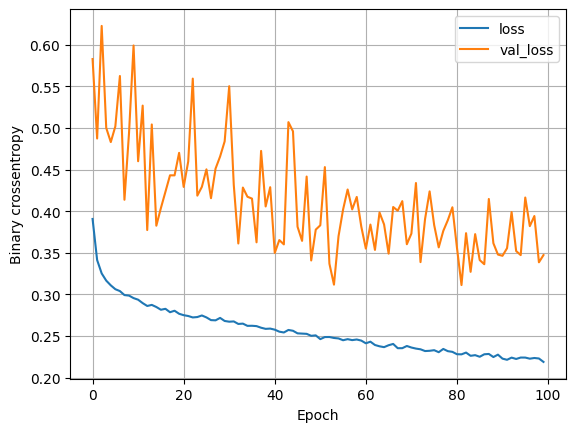

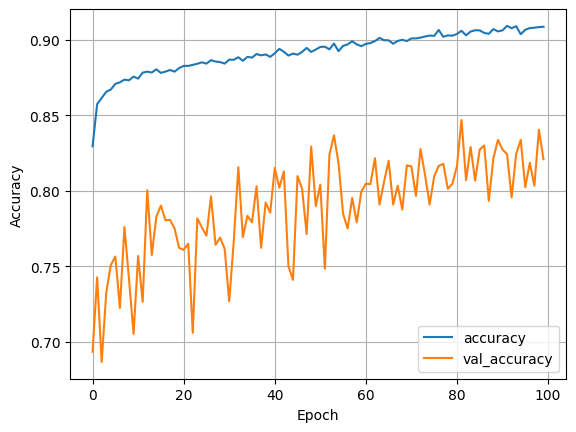

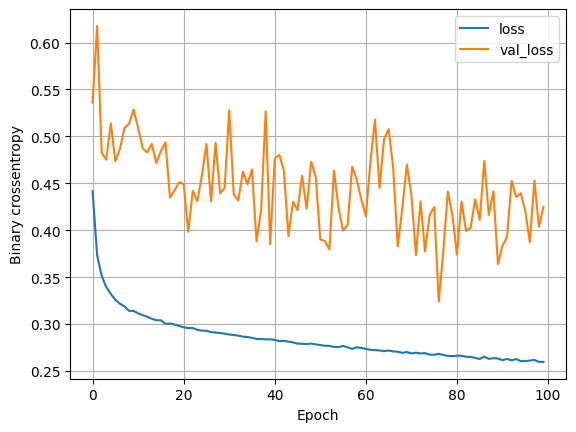

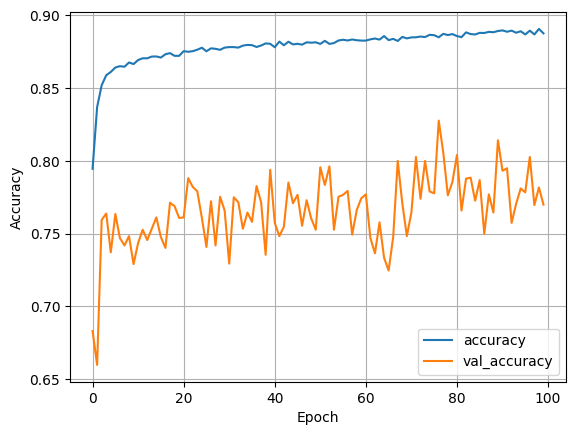

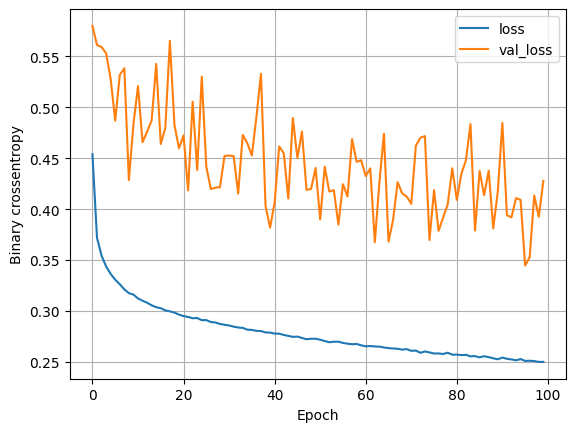

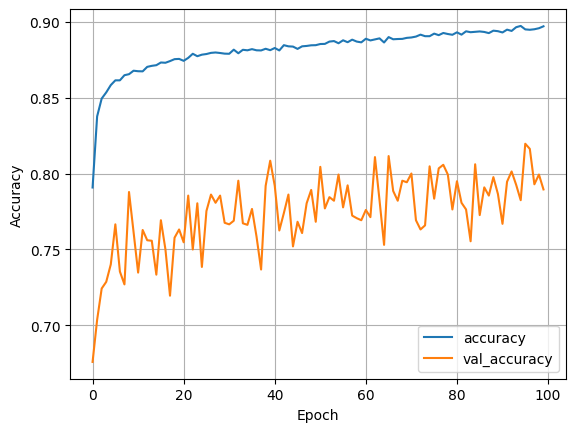

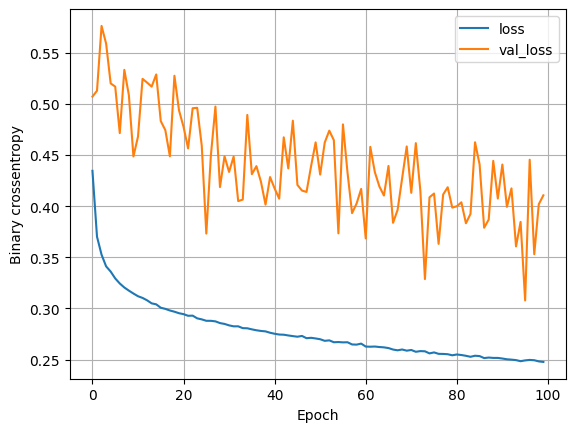

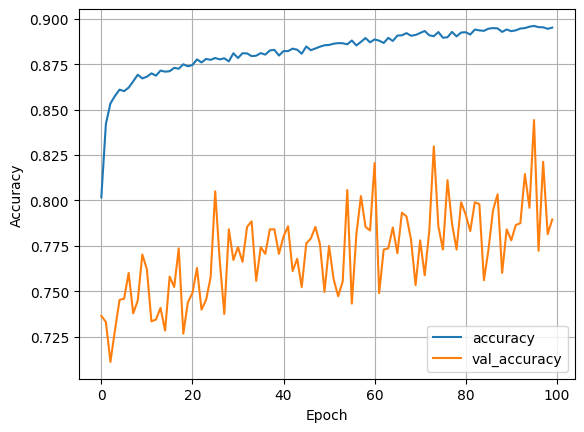

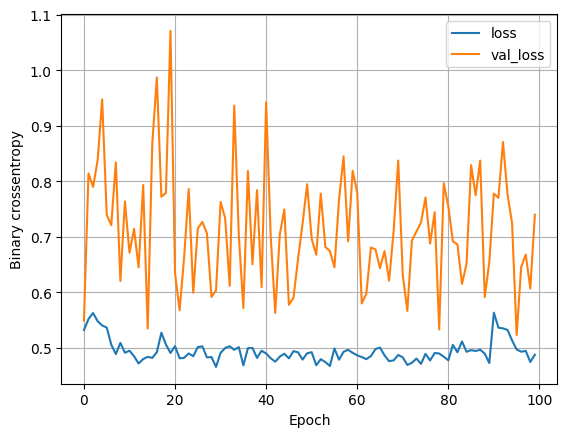

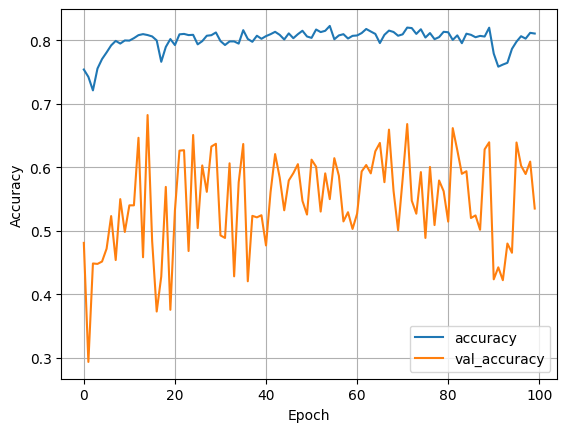

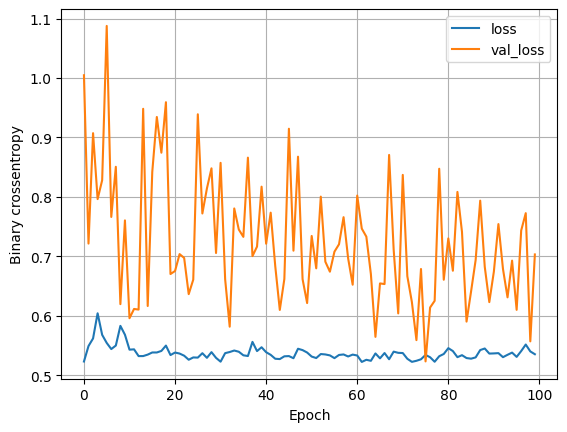

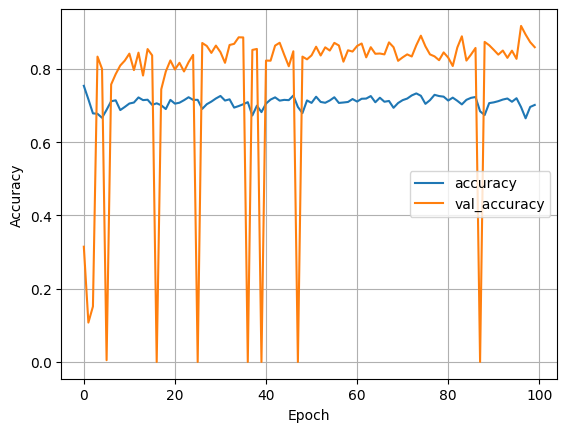

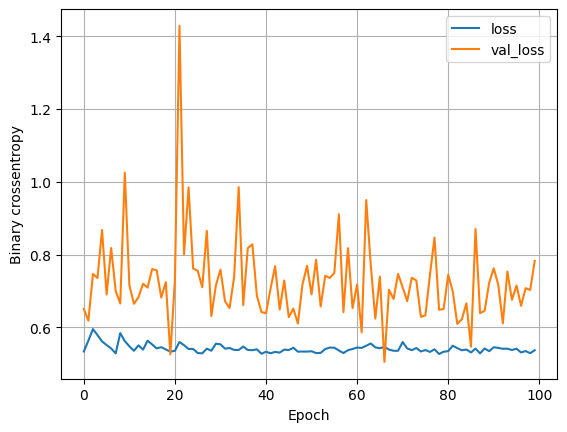

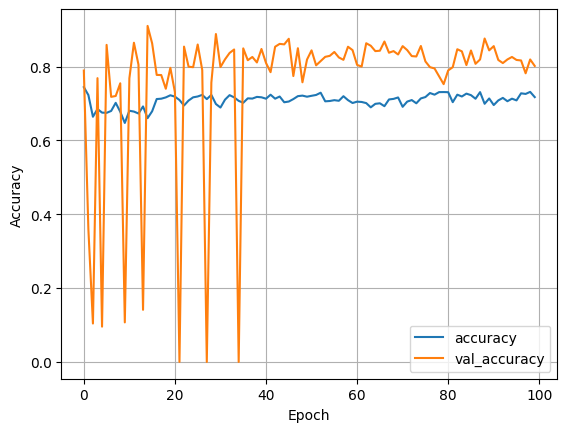

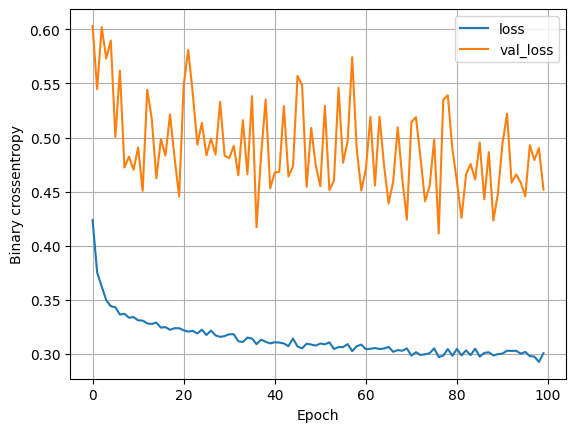

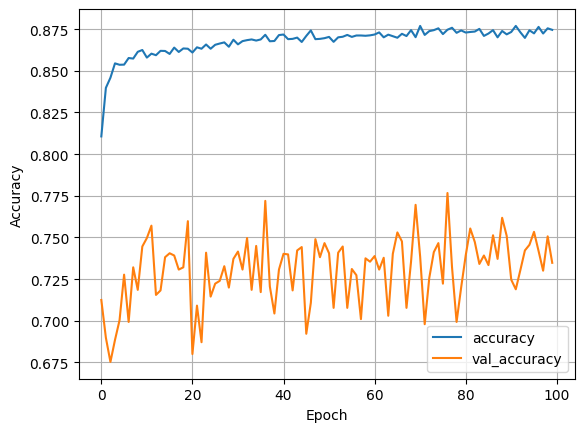

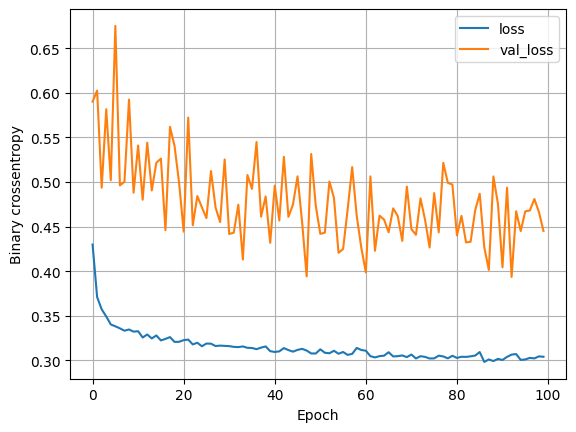

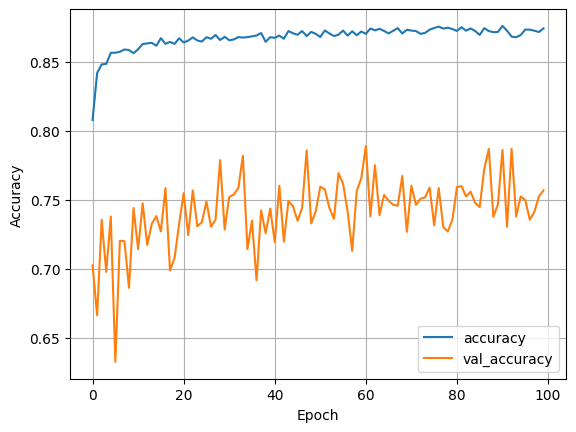

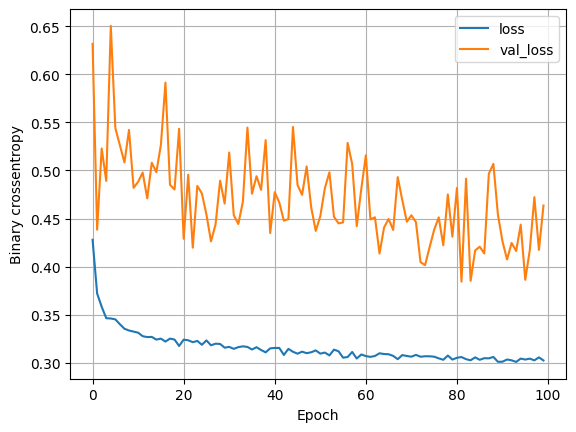

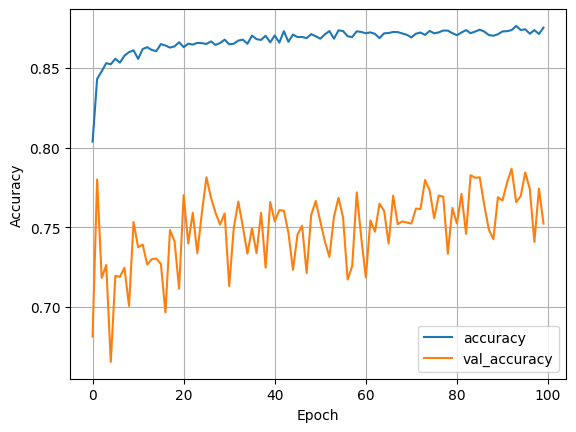

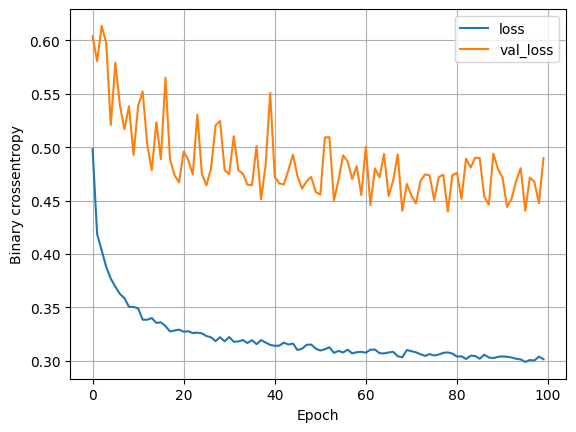

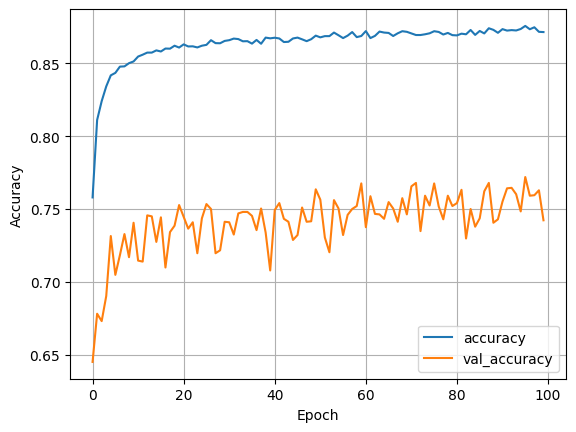

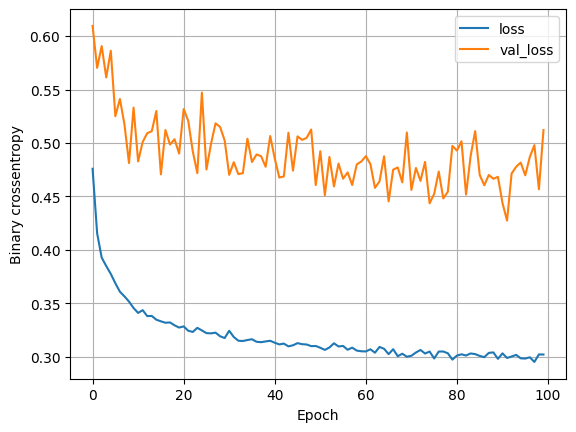

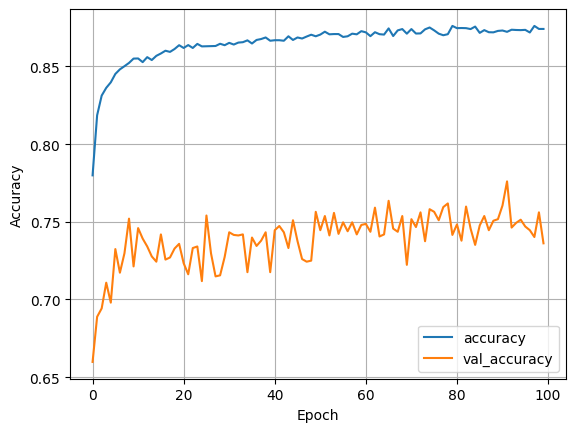

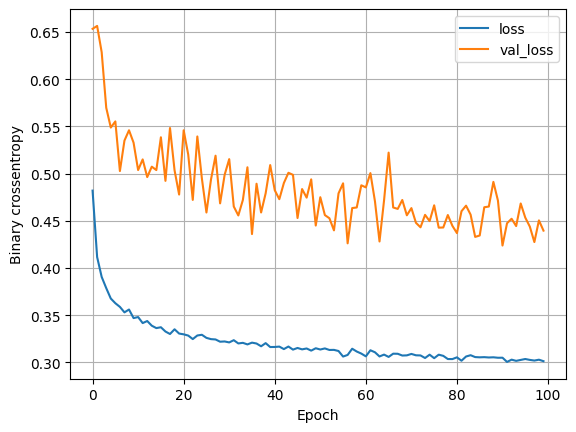

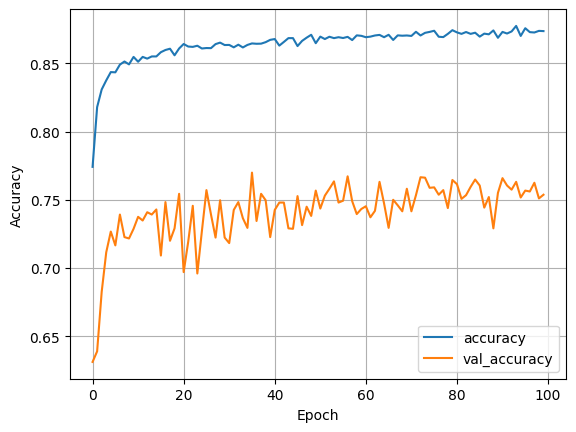

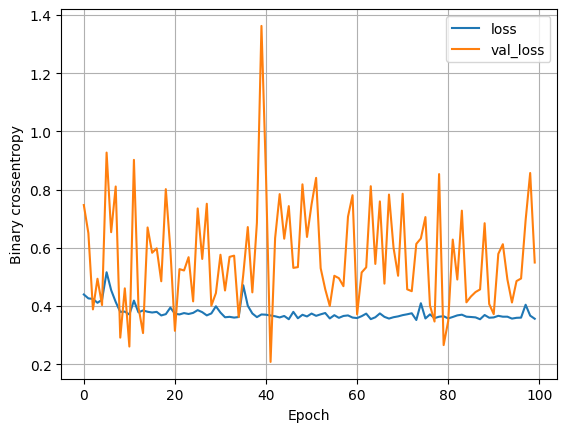

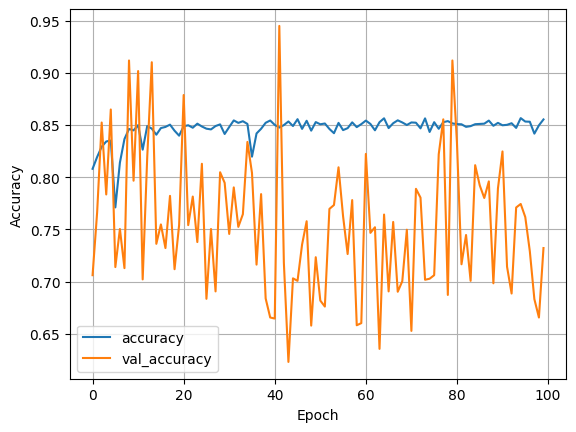

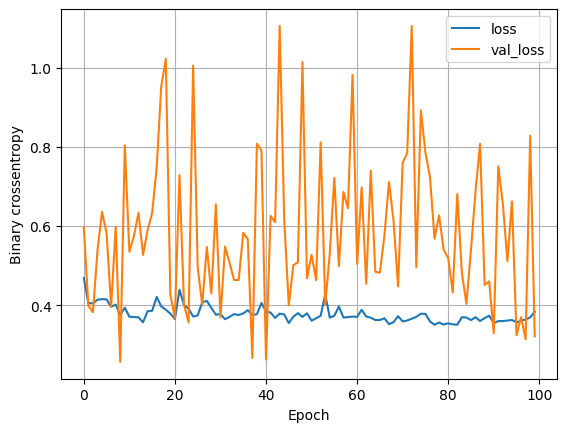

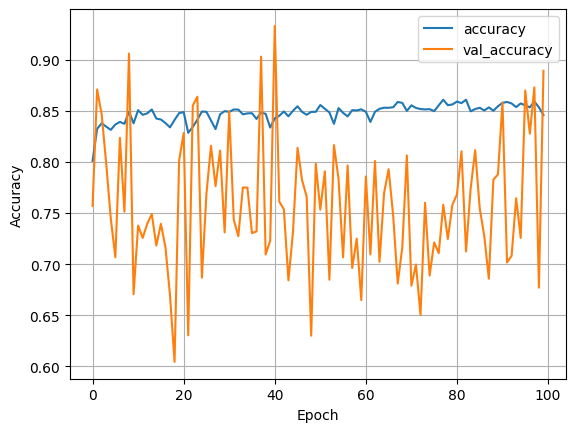

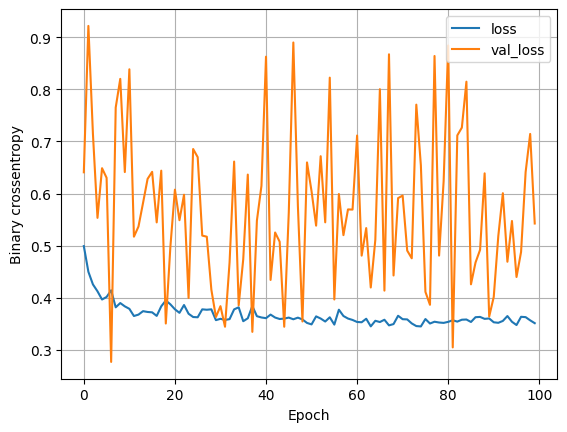

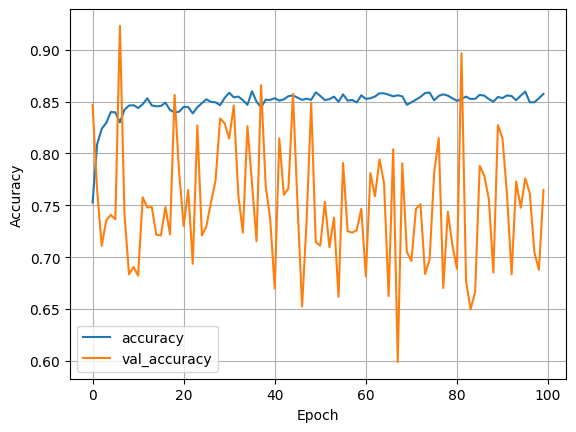

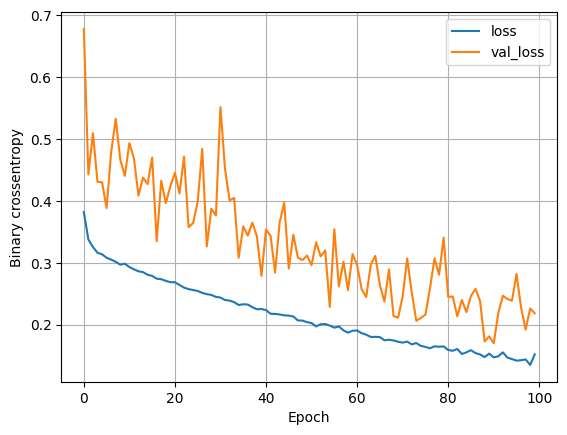

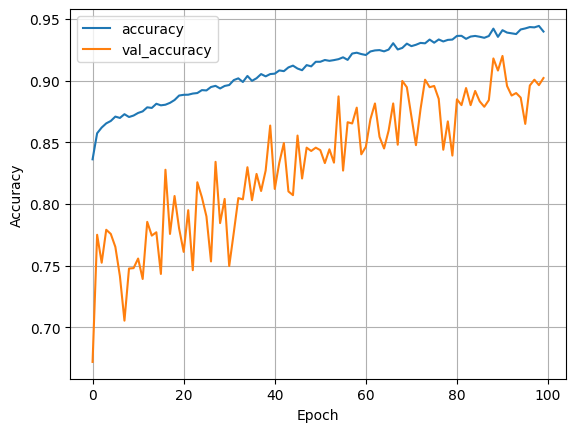

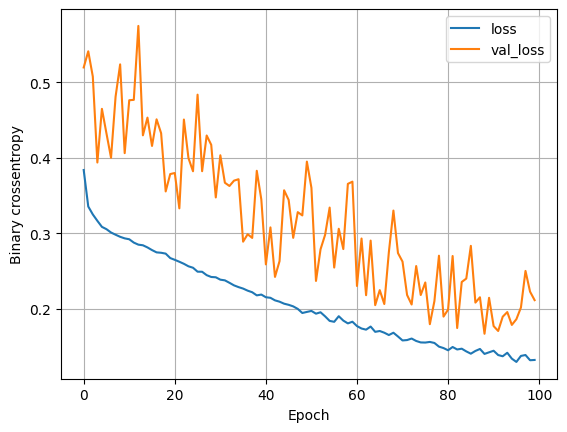

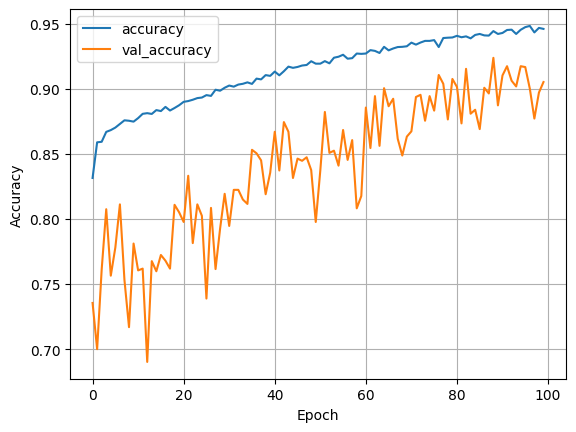

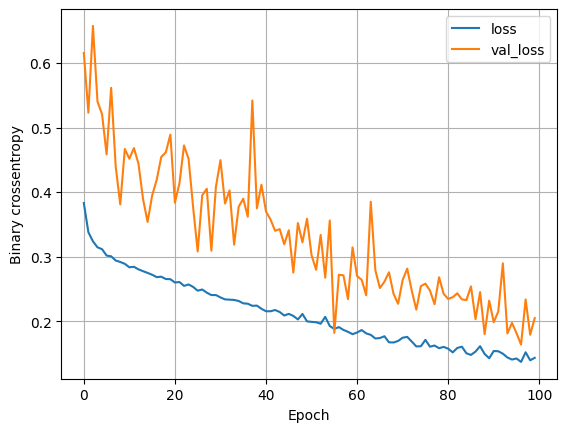

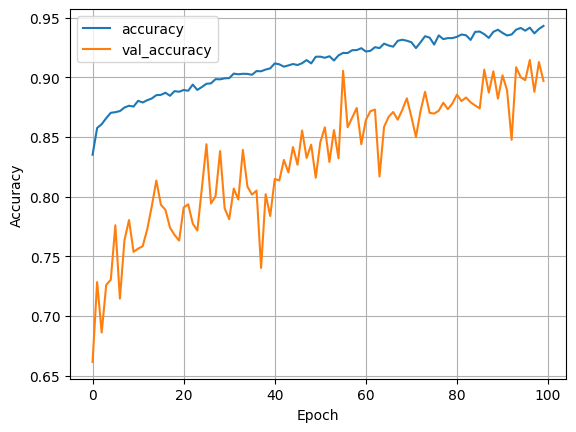

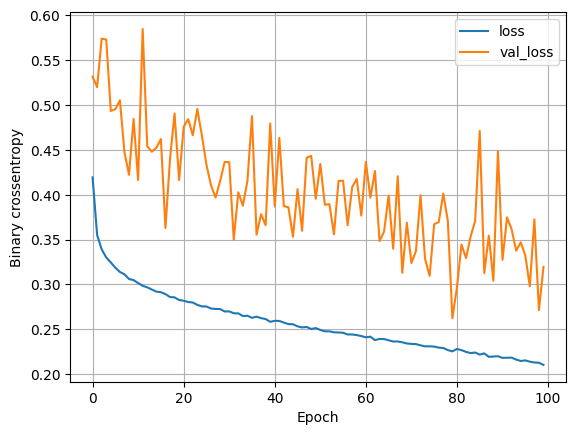

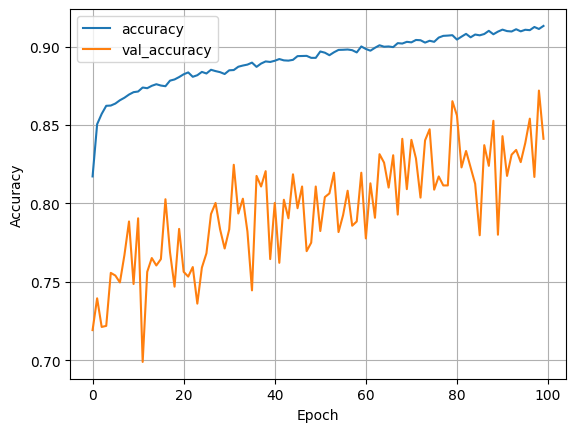

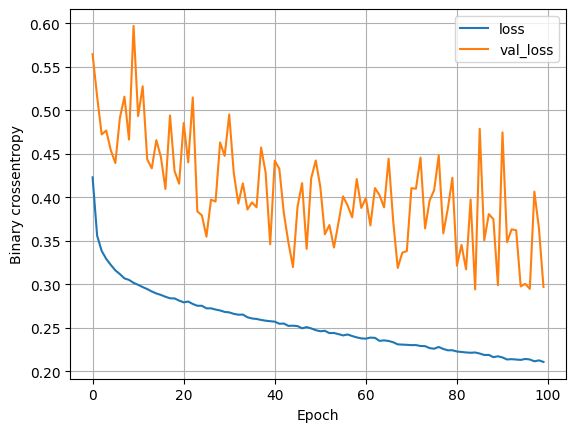

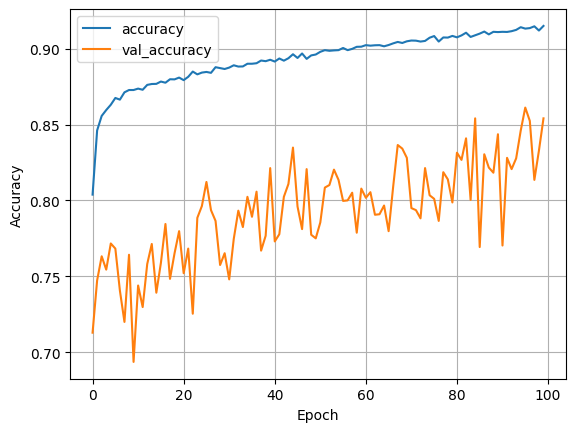

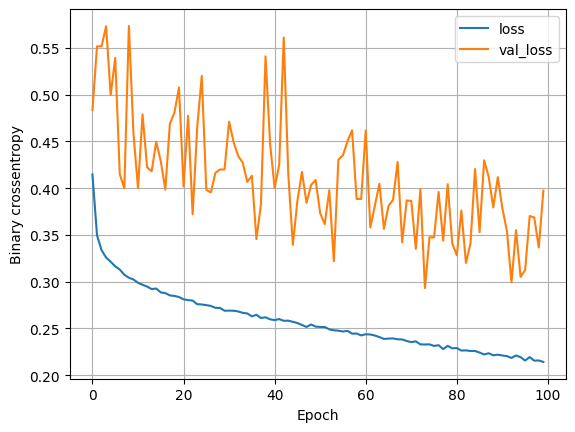

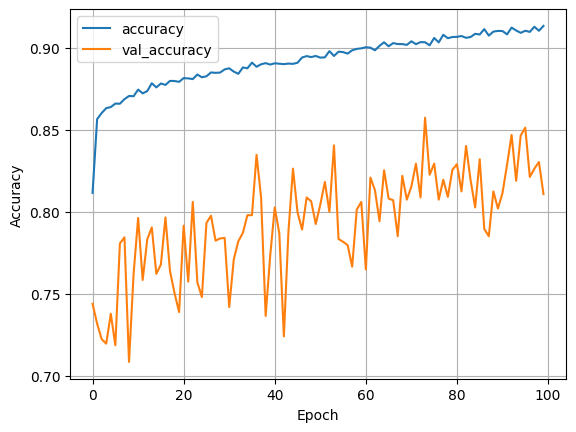

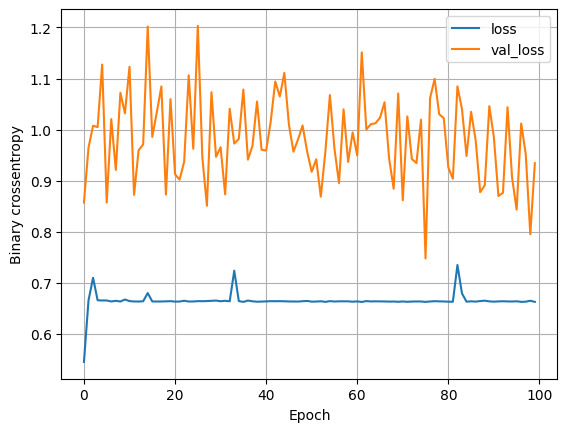

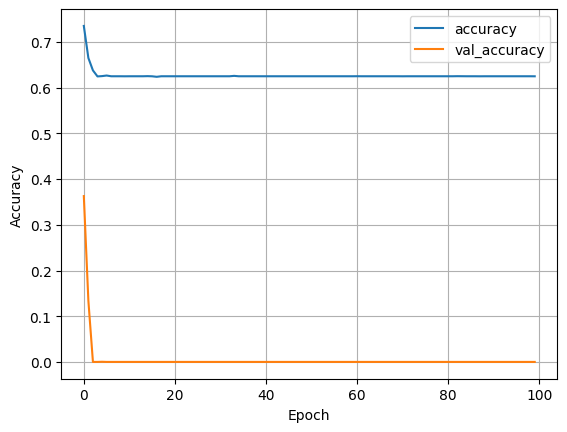

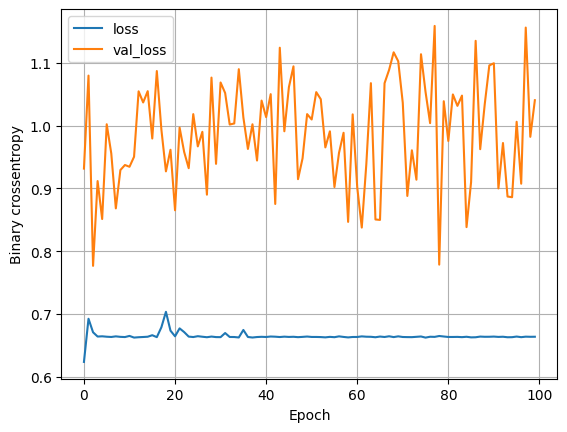

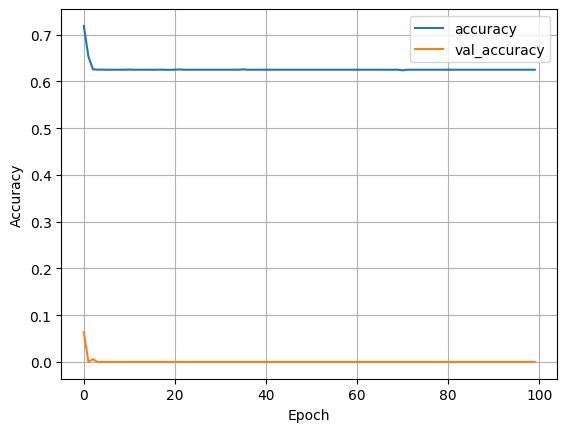

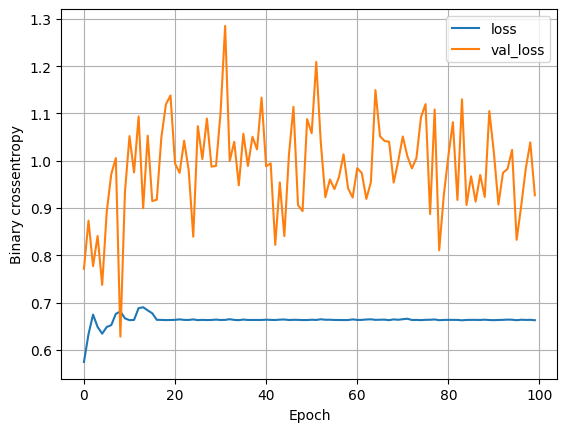

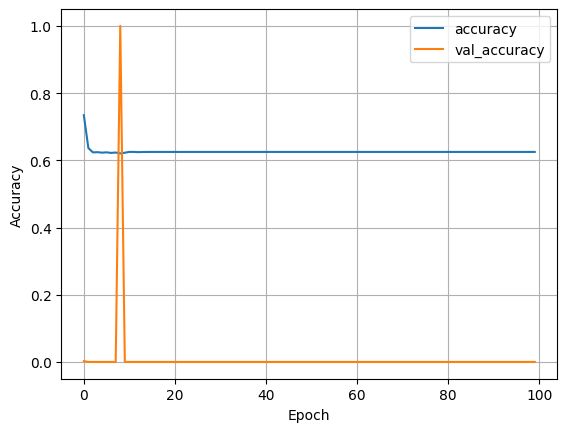

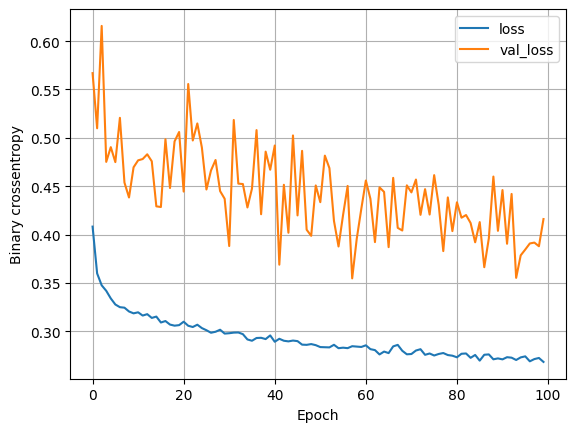

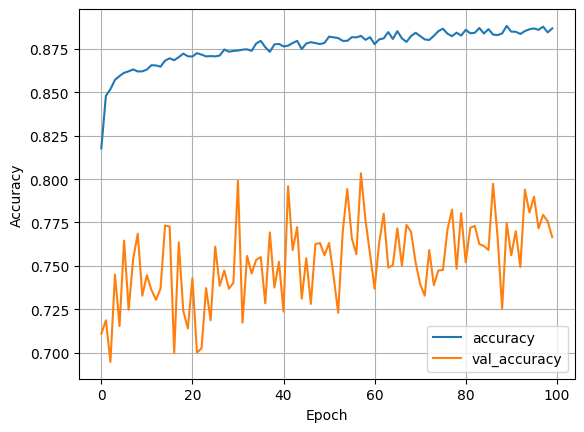

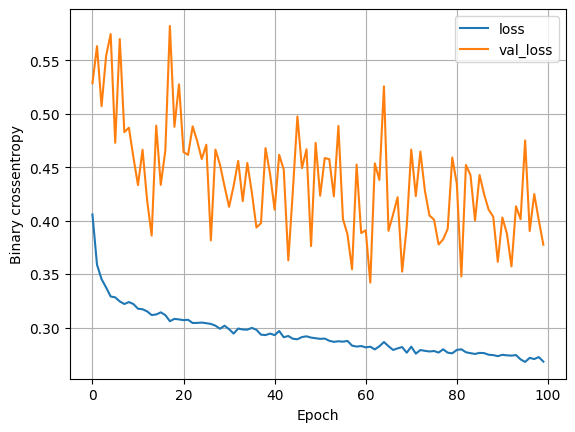

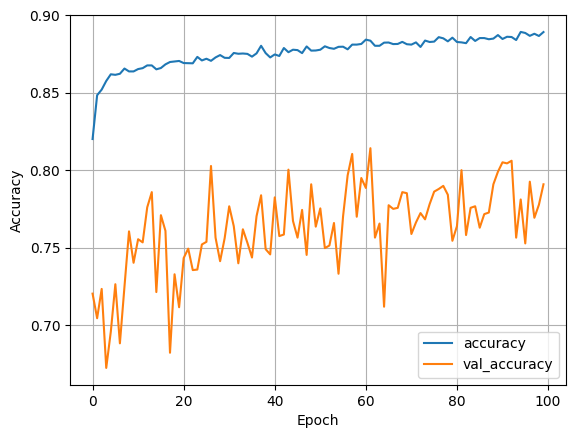

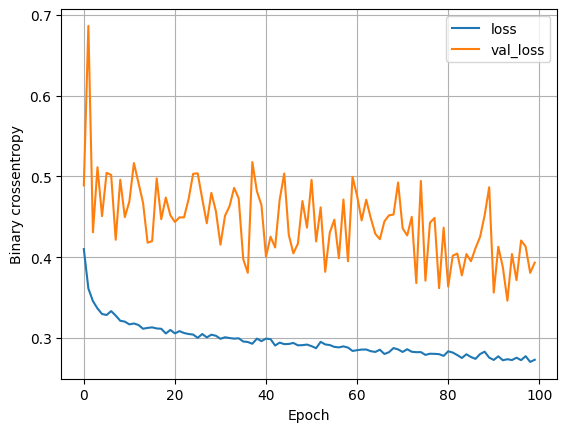

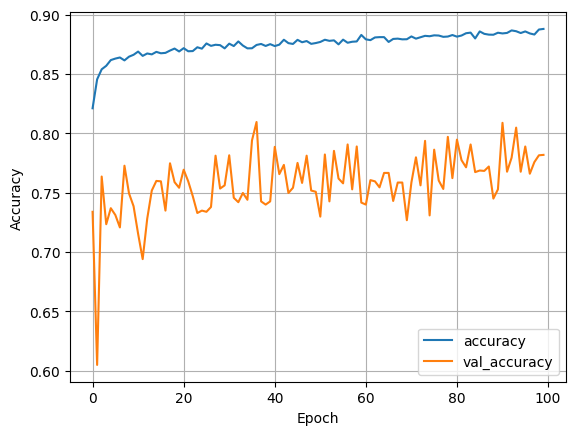

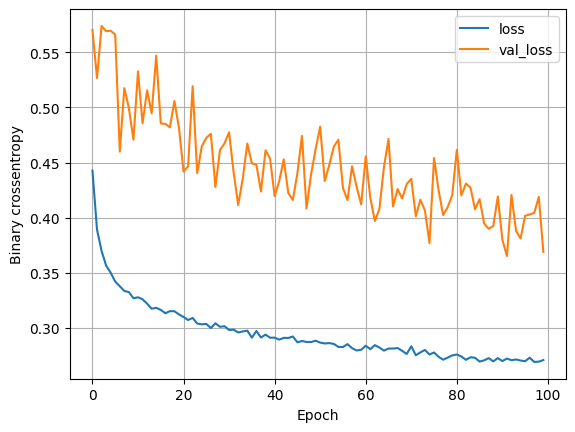

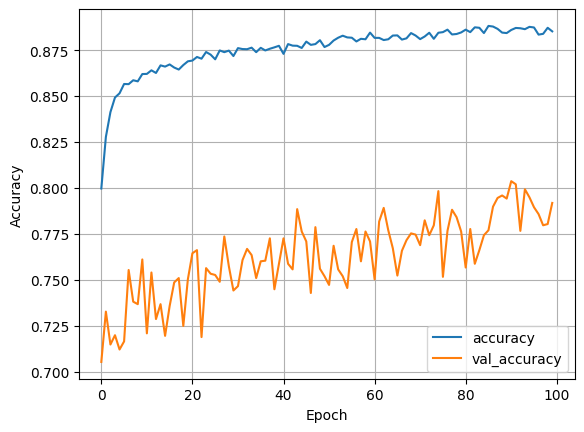

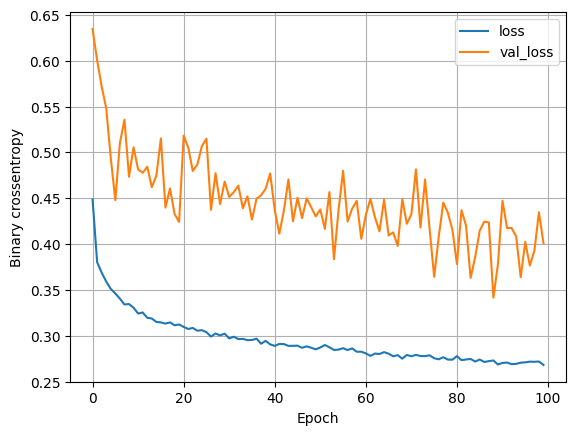

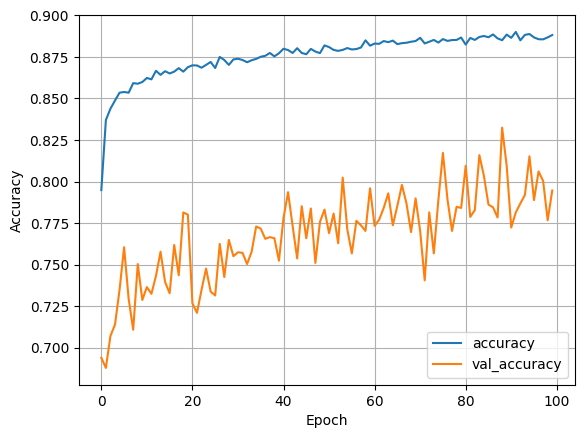

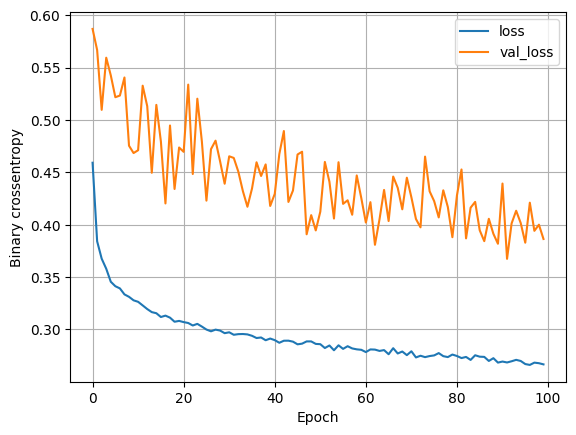

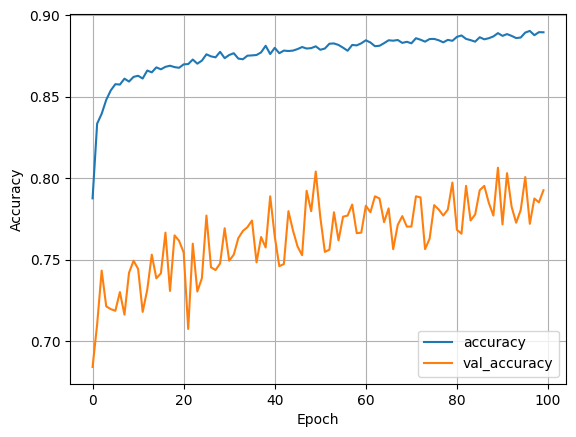

In [81]:
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32,64,128]:
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_loss(history)
                plot_accuracy(history)


AttributeError: 'NoneType' object has no attribute 'grid'

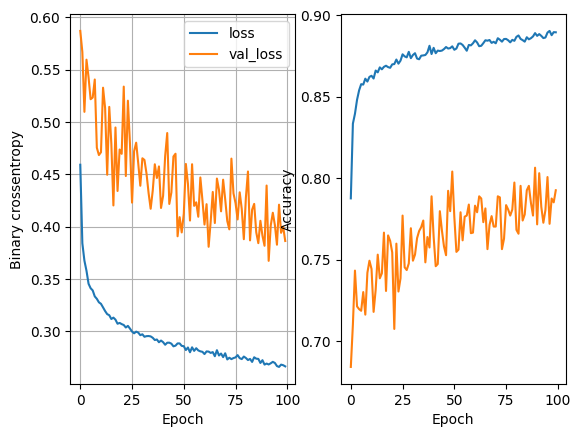

In [84]:
plot_loss(history)
plot_accuracy(history)
